In [2]:
import pandas as pd
import numpy as np # calcul scientifique
import matplotlib.pyplot as plt
import seaborn as sns

# Charger un dataset en ligne (exemple : ventes d'une entreprise)
# gdp.csv : nom de fichier pib
# stocké sur github
url = "https://raw.githubusercontent.com/datasets/gdp/master/data/gdp.csv" #jeux de données
df = pd.read_csv(url)

# Afficher les premières lignes
print(df.head())

# Informations sur le dataset
print(df.info())

# Statistiques descriptives
print(df.describe())

# Statistiques pour une colonne spécifique
colonne = df['Value']  # Adapter selon vos données

print(f"Moyenne: {colonne.mean():.2f}")
print(f"Médiane: {colonne.median():.2f}")
print(f"Mode: {colonne.mode()[0]:.2f}")
print(f"Écart-type: {colonne.std():.2f}")
print(f"Variance: {colonne.var():.2f}")
print(f"Min: {colonne.min():.2f}")
print(f"Max: {colonne.max():.2f}")

# Quartiles
print(f"Q1 (25%): {colonne.quantile(0.25):.2f}")
print(f"Q2 (50% - Médiane): {colonne.quantile(0.50):.2f}")
print(f"Q3 (75%): {colonne.quantile(0.75):.2f}")
print(f"IQR: {colonne.quantile(0.75) - colonne.quantile(0.25):.2f}")

  Country Name Country Code  Year         Value
0  Afghanistan          AFG  2000  3.521418e+09
1  Afghanistan          AFG  2001  2.813572e+09
2  Afghanistan          AFG  2002  3.825701e+09
3  Afghanistan          AFG  2003  4.520947e+09
4  Afghanistan          AFG  2004  5.224897e+09
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13979 entries, 0 to 13978
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country Name  13979 non-null  object 
 1   Country Code  13979 non-null  object 
 2   Year          13979 non-null  int64  
 3   Value         13979 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 437.0+ KB
None
               Year         Value
count  13979.000000  1.397900e+04
mean    1994.672866  1.207380e+12
std       17.731413  5.537517e+12
min     1960.000000  1.150263e+04
25%     1980.000000  2.233880e+09
50%     1996.000000  1.672591e+10
75%     2010.000000  2.058542e+11
max  

In [3]:
pip install ucimlrepo

In [4]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
wine_quality = fetch_ucirepo(id=186)

# data (as pandas dataframes)
X = wine_quality.data.features
y = wine_quality.data.targets

# metadata
print(wine_quality.metadata)

# variable information
print(wine_quality.variables)


{'uci_id': 186, 'name': 'Wine Quality', 'repository_url': 'https://archive.ics.uci.edu/dataset/186/wine+quality', 'data_url': 'https://archive.ics.uci.edu/static/public/186/data.csv', 'abstract': 'Two datasets are included, related to red and white vinho verde wine samples, from the north of Portugal. The goal is to model wine quality based on physicochemical tests (see [Cortez et al., 2009], http://www3.dsi.uminho.pt/pcortez/wine/).', 'area': 'Business', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 4898, 'num_features': 11, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['quality'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2009, 'last_updated': 'Wed Nov 15 2023', 'dataset_doi': '10.24432/C56S3T', 'creators': ['Paulo Cortez', 'A. Cerdeira', 'F. Almeida', 'T. Matos', 'J. Reis'], 'intro_paper': {'ID': 252, 'type': 'NATIVE', 'title': 'Modeling wine preferences

### Visualisation des données du PIB (df)

Commençons par explorer la distribution de la colonne 'Value' (valeur du PIB) à l'aide d'un histogramme.

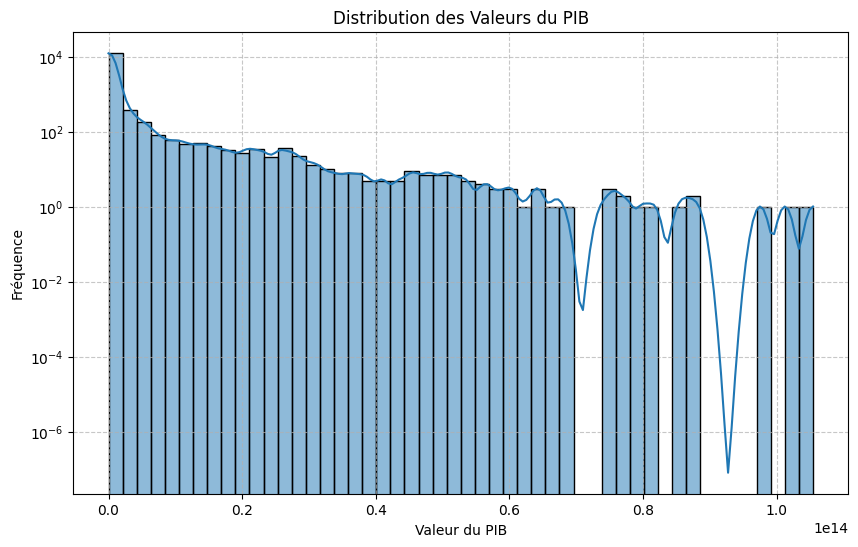

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.histplot(df['Value'], bins=50, kde=True)
plt.title('Distribution des Valeurs du PIB')
plt.xlabel('Valeur du PIB')
plt.ylabel('Fréquence')
plt.yscale('log') # Utilisation d'une échelle logarithmique pour mieux voir la distribution
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

Ensuite, visualisons l'évolution du PIB pour quelques pays au fil des ans. Choisissons quelques pays pour l'exemple.

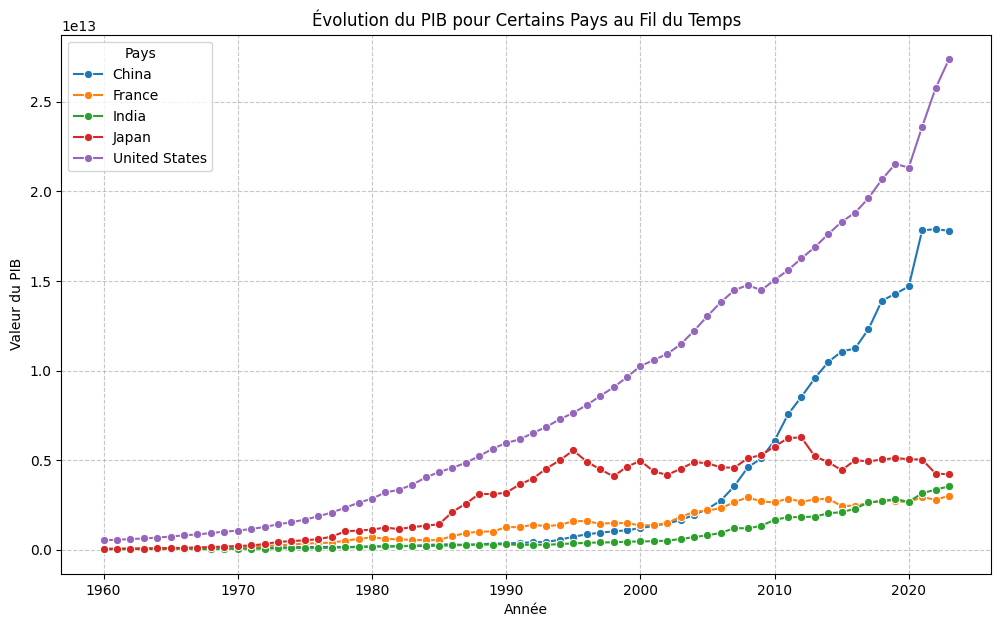

In [6]:
selected_countries = ['United States', 'China', 'France', 'India', 'Japan']
filtered_df = df[df['Country Name'].isin(selected_countries)]

plt.figure(figsize=(12, 7))
sns.lineplot(data=filtered_df, x='Year', y='Value', hue='Country Name', marker='o')
plt.title('Évolution du PIB pour Certains Pays au Fil du Temps')
plt.xlabel('Année')
plt.ylabel('Valeur du PIB')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend(title='Pays')
plt.show()

### Visualisation des données de Qualité du Vin (X et y)

Maintenant, explorons les données de qualité du vin. Nous allons commencer par les histogrammes de certaines caractéristiques (`X`) et de la qualité (`y`).

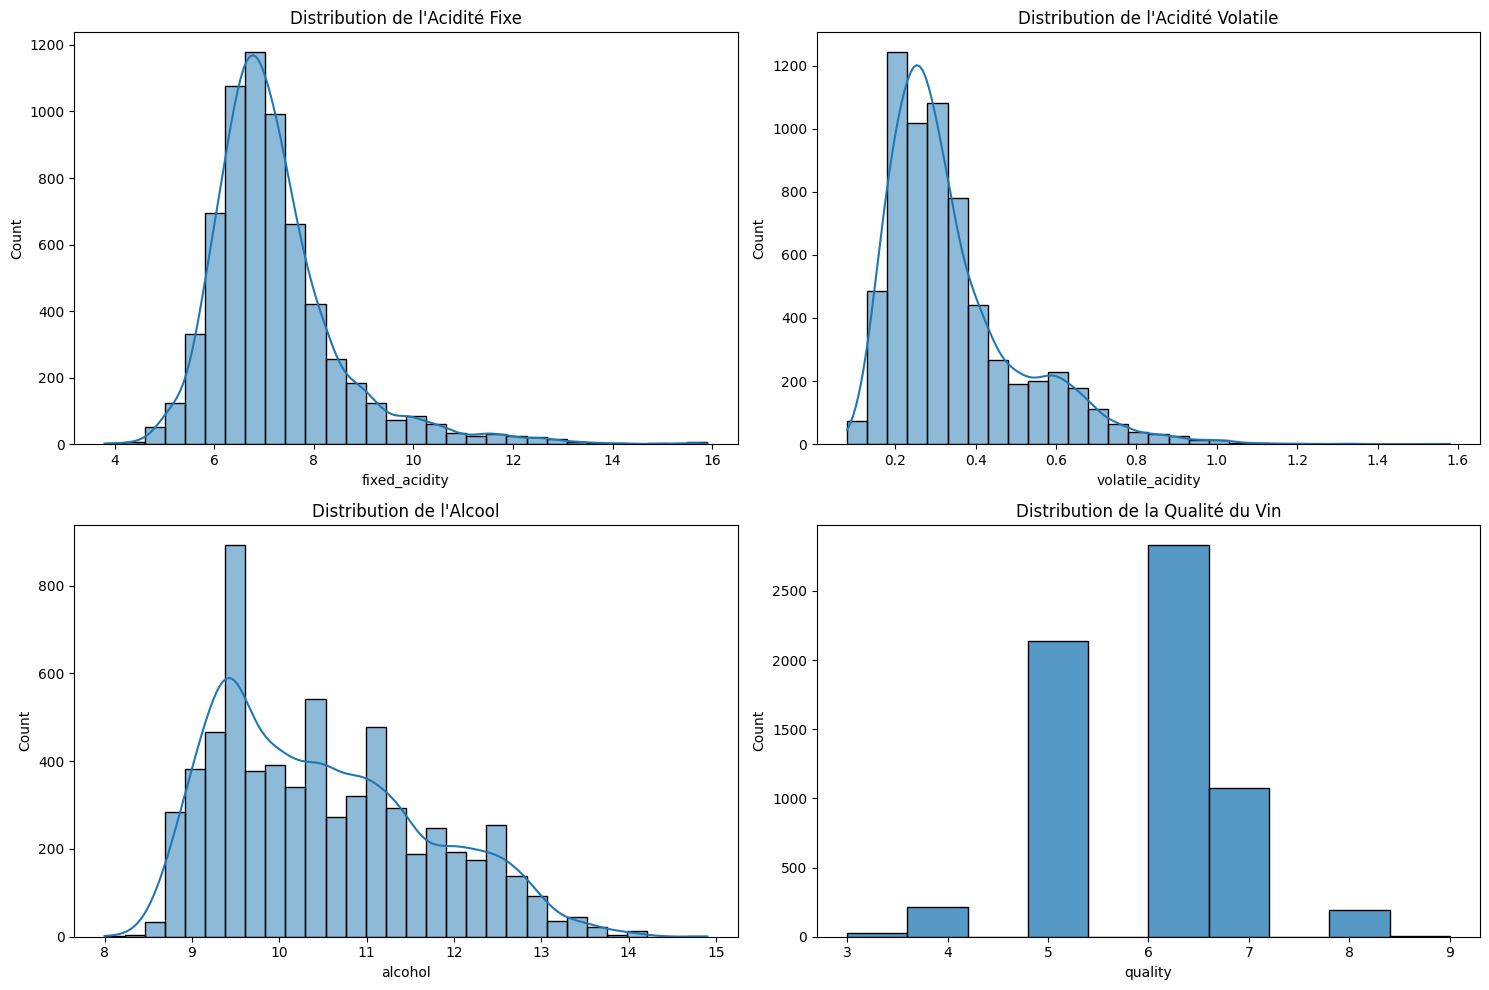

In [7]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(X['fixed_acidity'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution de l\'Acidité Fixe')

sns.histplot(X['volatile_acidity'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution de l\'Acidité Volatile')

sns.histplot(X['alcohol'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution de l\'Alcool')

sns.histplot(y['quality'], bins=10, kde=False, ax=axes[1, 1])
axes[1, 1].set_title('Distribution de la Qualité du Vin')
axes[1, 1].set_xticks(sorted(y['quality'].unique())) # S'assurer que chaque score de qualité a un tick

plt.tight_layout()
plt.show()

Pour finir, voici un diagramme en boîte montrant la distribution du niveau d'alcool en fonction de la qualité du vin.

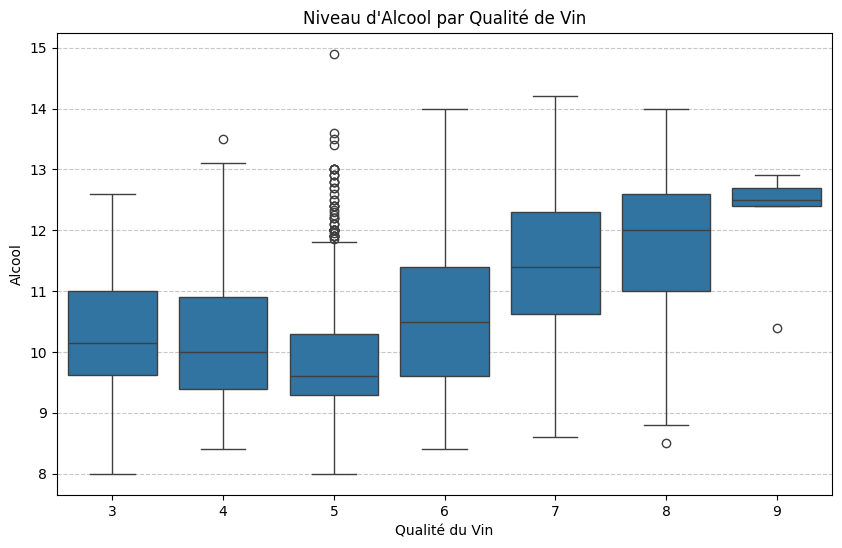

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=y['quality'], y=X['alcohol'])
plt.title('Niveau d\'Alcool par Qualité de Vin')
plt.xlabel('Qualité du Vin')
plt.ylabel('Alcool')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

### Tous les graphiques rassemblés en une seule image

Voici l'ensemble des visualisations précédentes combinées dans une seule figure pour une meilleure comparaison et vue d'ensemble.

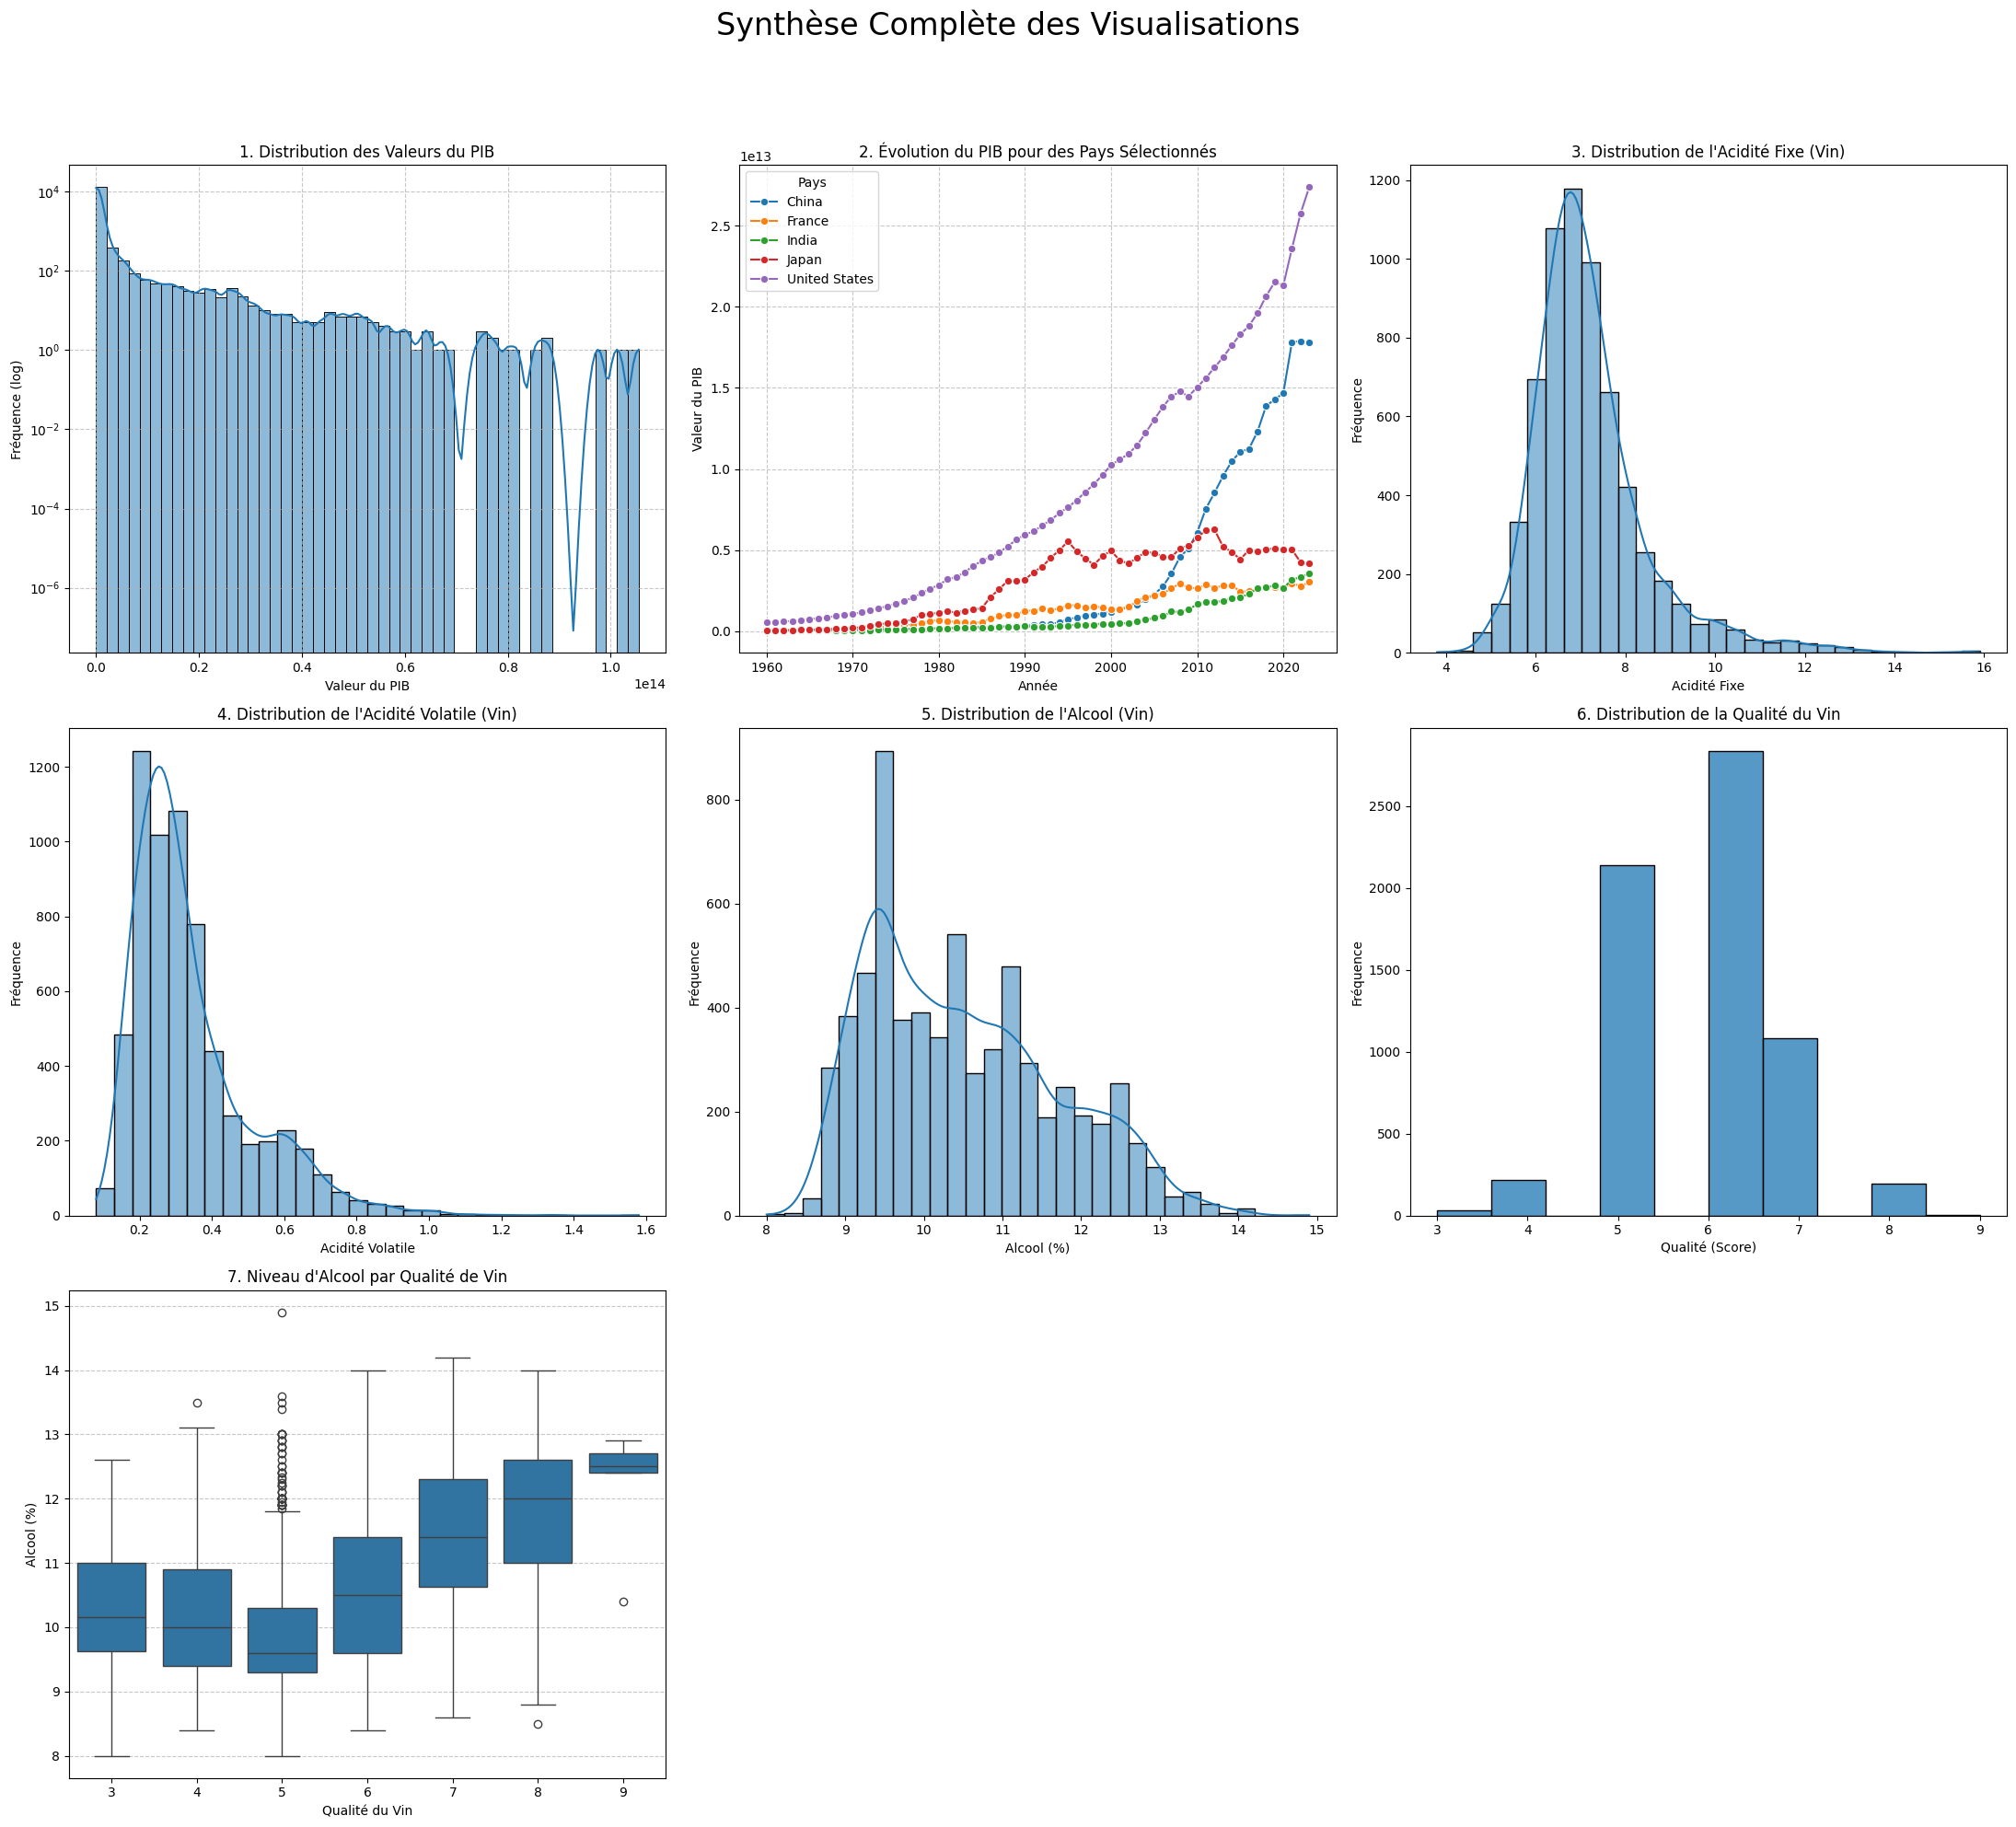

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assurez-vous que df, X et y sont chargés depuis les cellules précédentes
# Si le kernel a été réinitialisé, vous pourriez avoir besoin de réexécuter les cellules de chargement de données (URAOc1GLUMBF et o4v4ylC8cycV).

# Recréer filtered_df si nécessaire (cela dépend de l'état du notebook)
selected_countries = ['United States', 'China', 'France', 'India', 'Japan']
filtered_df = df[df['Country Name'].isin(selected_countries)]

fig, axes = plt.subplots(3, 3, figsize=(22, 20))
fig.suptitle('Synthèse Complète des Visualisations', y=1.02, fontsize=24)

# --- Graphique 1: Distribution des Valeurs du PIB ---
sns.histplot(df['Value'], bins=50, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('1. Distribution des Valeurs du PIB')
axes[0, 0].set_xlabel('Valeur du PIB')
axes[0, 0].set_ylabel('Fréquence (log)')
axes[0, 0].set_yscale('log')
axes[0, 0].grid(True, linestyle='--', alpha=0.7)

# --- Graphique 2: Évolution du PIB pour Certains Pays au Fil du Temps ---
sns.lineplot(data=filtered_df, x='Year', y='Value', hue='Country Name', marker='o', ax=axes[0, 1])
axes[0, 1].set_title('2. Évolution du PIB pour des Pays Sélectionnés')
axes[0, 1].set_xlabel('Année')
axes[0, 1].set_ylabel('Valeur du PIB')
axes[0, 1].grid(True, linestyle='--', alpha=0.7)
axes[0, 1].legend(title='Pays', loc='upper left')

# --- Graphique 3: Distribution de l'Acidité Fixe ---
sns.histplot(X['fixed_acidity'], bins=30, kde=True, ax=axes[0, 2])
axes[0, 2].set_title('3. Distribution de l\'Acidité Fixe (Vin)')
axes[0, 2].set_xlabel('Acidité Fixe')
axes[0, 2].set_ylabel('Fréquence')

# --- Graphique 4: Distribution de l'Acidité Volatile ---
sns.histplot(X['volatile_acidity'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('4. Distribution de l\'Acidité Volatile (Vin)')
axes[1, 0].set_xlabel('Acidité Volatile')
axes[1, 0].set_ylabel('Fréquence')

# --- Graphique 5: Distribution de l'Alcool ---
sns.histplot(X['alcohol'], bins=30, kde=True, ax=axes[1, 1])
axes[1, 1].set_title('5. Distribution de l\'Alcool (Vin)')
axes[1, 1].set_xlabel('Alcool (%)')
axes[1, 1].set_ylabel('Fréquence')

# --- Graphique 6: Distribution de la Qualité du Vin ---
sns.histplot(y['quality'], bins=10, kde=False, ax=axes[1, 2])
axes[1, 2].set_title('6. Distribution de la Qualité du Vin')
axes[1, 2].set_xlabel('Qualité (Score)')
axes[1, 2].set_ylabel('Fréquence')
axes[1, 2].set_xticks(sorted(y['quality'].unique()))

# --- Graphique 7: Niveau d'Alcool par Qualité de Vin ---
sns.boxplot(x=y['quality'], y=X['alcohol'], ax=axes[2, 0])
axes[2, 0].set_title('7. Niveau d\'Alcool par Qualité de Vin')
axes[2, 0].set_xlabel('Qualité du Vin')
axes[2, 0].set_ylabel('Alcool (%)')
axes[2, 0].grid(axis='y', linestyle='--', alpha=0.7)

# Cacher les sous-graphiques inutilisés de la grille
axes[2, 1].axis('off')
axes[2, 2].axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.98]) # Ajuster pour éviter le chevauchement du titre principal
plt.show()